# Concise Implementation of Recurrent Neural Networks



In [1]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

Defining the Model

In [3]:
class RNN(d2l.Module):  
    """The RNN model implemented with high-level APIs."""
    def __init__(self, num_inputs, num_hiddens):
        super().__init__()
        self.save_hyperparameters()
        self.rnn = nn.RNN(num_inputs, num_hiddens)

    def forward(self, inputs, H=None):
        return self.rnn(inputs, H)

class RNNLM(d2l.RNNLMScratch):  
    """The RNN-based language model implemented with high-level APIs."""
    def init_params(self):
        self.linear = nn.LazyLinear(self.vocab_size)

    def output_layer(self, hiddens):
        return self.linear(hiddens).swapaxes(0, 1)

Make a prediction 
with a model initialized with random weights

In [4]:
data = d2l.TimeMachine(batch_size=1024, num_steps=32)
rnn = RNN(num_inputs=len(data.vocab), num_hiddens=32)
model = RNNLM(rnn, vocab_size=len(data.vocab), lr=1)
model.predict('it has', 20, data.vocab)

'it hasj bbbbbbbbbbbbbbbbbb'

Train our model, leveraging the high-level API

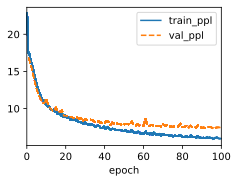

In [5]:
trainer = d2l.Trainer(max_epochs=100, gradient_clip_val=1, num_gpus=1)
trainer.fit(model, data)

In [6]:
model.predict('it has', 20, data.vocab, d2l.try_gpu())

'it has arout the the trave'